In [ ]:
from numba import cuda
import cv2
import numpy as np
import matplotlib.pyplot as plt

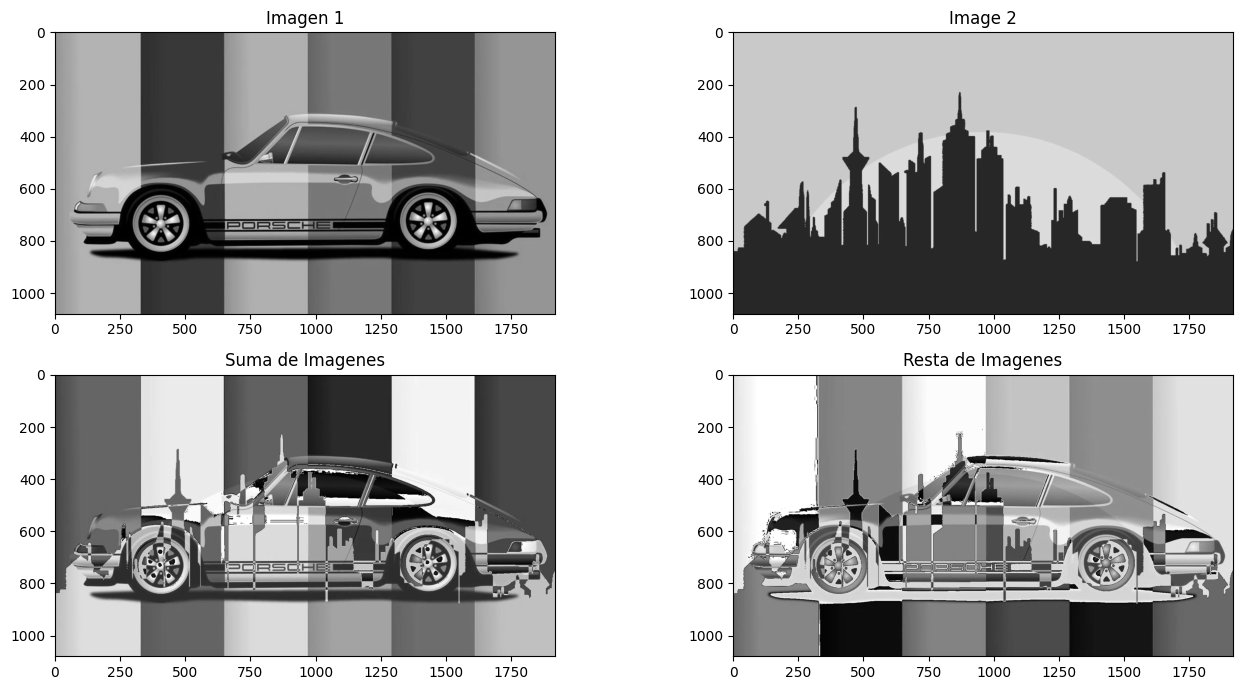

In [ ]:
@cuda.jit
def sumar_imagenes(imagen1, imagen2, result):
    x, y = cuda.grid(2)
    if x < imagen1.shape[0] and y < imagen1.shape[1]:
        result[x, y] = imagen1[x, y] + imagen2[x, y]

@cuda.jit
def restar_imagenes(imagen1, imagen2, result):
    x, y = cuda.grid(2)
    if x < imagen1.shape[0] and y < imagen1.shape[1]:
        result[x, y] = imagen1[x, y] - imagen2[x, y]

imagen1 = cv2.imread('/content/image3.jpg', cv2.IMREAD_GRAYSCALE)
imagen2 = cv2.imread('/content/image4.jpg', cv2.IMREAD_GRAYSCALE)

img1_gpu = cuda.to_device(imagen1)
img2_gpu = cuda.to_device(imagen2)
result_gpu_sumar = cuda.device_array_like(imagen1)
result_gpu_restar = cuda.device_array_like(imagen1)

threads_per_block = (16, 16)
blocks_per_grid_x = (imagen1.shape[0] + threads_per_block[0] - 1) // threads_per_block[0]
blocks_per_grid_y = (imagen1.shape[1] + threads_per_block[1] - 1) // threads_per_block[1]
blocks_per_grid = (blocks_per_grid_x, blocks_per_grid_y)

sumar_imagenes[blocks_per_grid, threads_per_block](img1_gpu, img2_gpu, result_gpu_sumar)
restar_imagenes[blocks_per_grid, threads_per_block](img1_gpu, img2_gpu, result_gpu_restar)
cuda.synchronize()

plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.imshow(imagen1, cmap='gray')
plt.title('Imagen 1')

plt.subplot(2, 2, 2)
plt.imshow(imagen2, cmap='gray')
plt.title('Image 2')

plt.subplot(2, 2, 3)
plt.imshow(result_gpu_sumar.copy_to_host(), cmap='gray')
plt.title('Suma de Imagenes')

plt.subplot(2, 2, 4)
plt.imshow(result_gpu_restar.copy_to_host(), cmap='gray')
plt.title('Resta de Imagenes')

plt.tight_layout()
plt.show()
